# Heart-Attack(Classification) Project


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import confusion_matrix



In [4]:
heart_data = pd.read_csv("heart.csv")
heart_data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [5]:
X = heart_data.drop('output', axis=1)
y = heart_data['output']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [9]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [13]:
y_pred = model.predict(X_test_scaled)

In [14]:
accuracy = accuracy_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

In [18]:
plt.figure(figsize=(15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

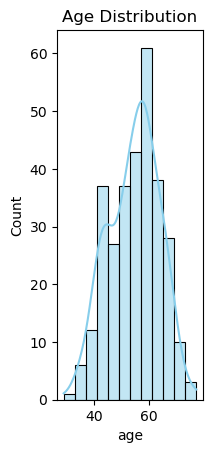

In [19]:
plt.subplot(1, 3, 1)
sns.histplot(heart_data['age'], kde=True, color="skyblue")
plt.title('Age Distribution')

Text(0.5, 1.0, 'Cholesterol Distribution')

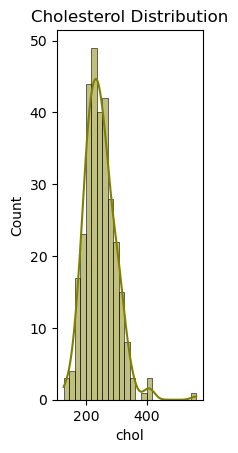

In [20]:
plt.subplot(1, 3, 2)
sns.histplot(heart_data['chol'], kde=True, color="olive")
plt.title('Cholesterol Distribution')


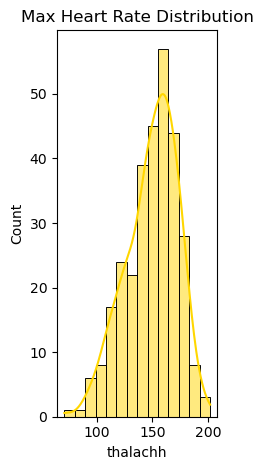

In [22]:
plt.subplot(1, 3, 3)
sns.histplot(heart_data['thalachh'], kde=True, color="gold")
plt.title('Max Heart Rate Distribution')

plt.tight_layout()
plt.show()


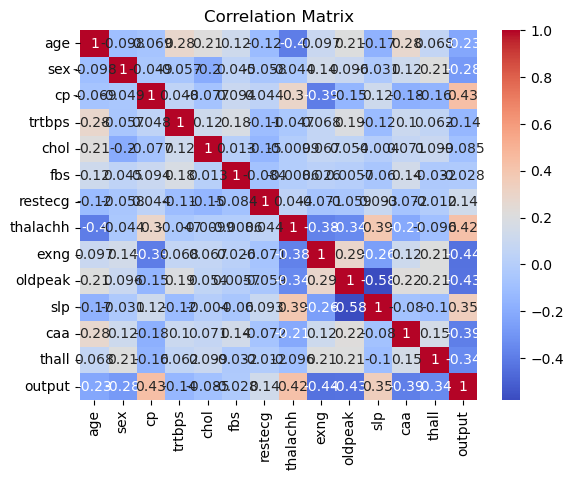

In [23]:
sns.heatmap(heart_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

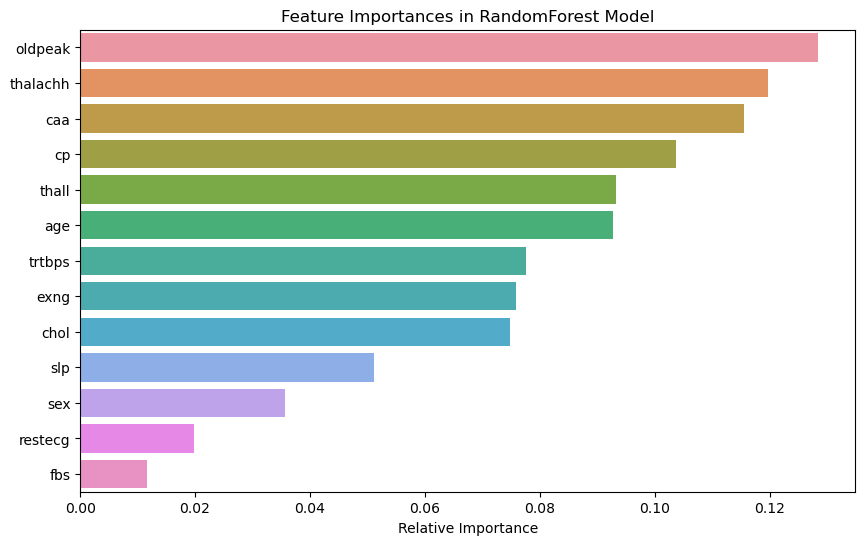

In [26]:
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances in RandomForest Model')
plt.xlabel('Relative Importance')
plt.show()


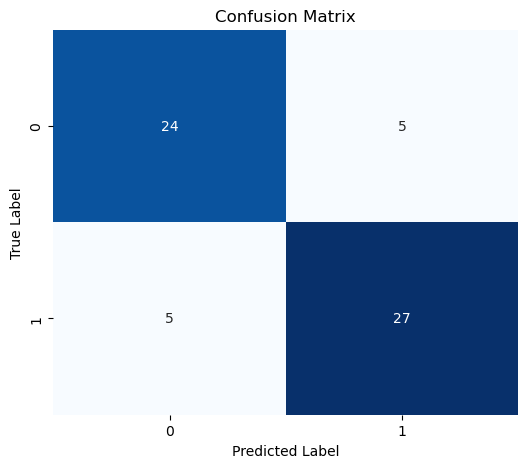

In [27]:
conf_matrix = confusion_matrix(y_test, model.predict(X_test_scaled))

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()